In [2]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt


In [3]:
from numpy import loadtxt
from keras.models import load_model
 
# load models
mfccmodel = load_model('nn_mfcc_model.h5')
melmodel=load_model('nn_mel_model.h5')
chromamodel=load_model('nn_chroma_model.h5')
tonnetzmodel=load_model('nn_tonnetz_model.h5')
contrastmodel=load_model('nn_contrast_model.h5')


Using TensorFlow backend.


In [4]:
import pandas as pd
import os
import librosa
import numpy as np
import tensorflow
import keras

In [5]:
def extract_mfcc(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') # default is Kaiser_best
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
     
    return mfccsscaled

def extract_mel(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') # default is Kaiser_best
        mel = np.mean(librosa.feature.melspectrogram(audio, sr=sample_rate).T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
     
    return mel

def extract_contrast(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') # default is Kaiser_best
        stft = np.abs(librosa.stft(audio))
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
     
    return contrast

def extract_chroma(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') # default is Kaiser_best
        stft = np.abs(librosa.stft(audio))
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
     
    return chroma

def extract_tonnetz(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') # default is Kaiser_best
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(audio),
        sr=sample_rate).T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
     
    return tonnetz

In [39]:
# Set the path to the full UrbanSound dataset
i=0
fulldatasetpath = 'G:/urban_dataset'

metadata = pd.read_csv(fulldatasetpath + '/metadata/UrbanSound8K.csv')

mfccfeatures = []
melfeatures=[]
contrastfeatures=[]
chromafeatures=[]
tonnetzfeatures=[]

for index, row in metadata.iterrows():
  if i<250: 
     i+=1
     file_name = os.path.join(os.path.abspath(fulldatasetpath),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    
     class_label = row["class"]
     mfccdata = extract_mfcc(file_name)
     meldata=extract_mel(file_name)
     chromadata=extract_chroma(file_name)
     contrastdata=extract_contrast(file_name)
     tonnetzdata=extract_tonnetz(file_name)
    
     mfccfeatures.append([mfccdata, class_label])
     melfeatures.append([meldata, class_label])
     contrastfeatures.append([contrastdata, class_label])
     chromafeatures.append([chromadata, class_label])
     tonnetzfeatures.append([tonnetzdata, class_label])

# Convert into a Panda dataframe 
mfccdf = pd.DataFrame(mfccfeatures, columns=['feature','class_label'])
meldf = pd.DataFrame(melfeatures, columns=['feature','class_label'])
contrastdf = pd.DataFrame(contrastfeatures, columns=['feature','class_label'])
chromadf = pd.DataFrame(chromafeatures, columns=['feature','class_label'])
tonnetzdf = pd.DataFrame(tonnetzfeatures, columns=['feature','class_label'])

print('Finished feature extraction')

C:\Users\Admin\Anaconda3\envs\tensorflow\lib\site-packages\librosa\core\pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


Finished feature extraction


In [63]:
i=0
fulldatasetpath = 'G:/urban_dataset'

metadata = pd.read_csv(fulldatasetpath + '/metadata/UrbanSound8K.csv')

mfccfeatures1 = []
melfeatures1=[]
contrastfeatures1=[]
chromafeatures1=[]
tonnetzfeatures1=[]

for index, row in metadata.iterrows():
  if i>250 and i<1000: 
    
     file_name = os.path.join(os.path.abspath(fulldatasetpath),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    
     class_label1 = row["class"]
     mfccdata1 = extract_mfcc(file_name)
     meldata1=extract_mel(file_name)
     chromadata1=extract_chroma(file_name)
     contrastdata1=extract_contrast(file_name)
     tonnetzdata1=extract_tonnetz(file_name)
    
     mfccfeatures1.append([mfccdata1, class_label1])
     melfeatures1.append([meldata1, class_label1])
     contrastfeatures1.append([contrastdata1, class_label1])
     chromafeatures1.append([chromadata1, class_label1])
     tonnetzfeatures1.append([tonnetzdata1, class_label1])
  i+=1
# Convert into a Panda dataframe 
mfccdf1 = pd.DataFrame(mfccfeatures1, columns=['feature','class_label'])
meldf1 = pd.DataFrame(melfeatures1, columns=['feature','class_label'])
contrastdf1 = pd.DataFrame(contrastfeatures1, columns=['feature','class_label'])
chromadf1 = pd.DataFrame(chromafeatures1, columns=['feature','class_label'])
tonnetzdf1 = pd.DataFrame(tonnetzfeatures1, columns=['feature','class_label'])

print('Finished feature extraction')

Finished feature extraction


In [40]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
mfccX = np.array(mfccdf.feature.tolist())
melX = np.array(meldf.feature.tolist())
chromaX = np.array(chromadf.feature.tolist())
contrastX = np.array(contrastdf.feature.tolist())
tonnetzX = np.array(tonnetzdf.feature.tolist())
y = np.array(meldf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))
print(y.shape)
print(len(meldf.class_label.tolist()))
print(yy.shape)

(250,)
250
(250, 10)


In [65]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
mfccX1 = np.array(mfccdf1.feature.tolist())
melX1 = np.array(meldf1.feature.tolist())
chromaX1 = np.array(chromadf1.feature.tolist())
contrastX1 = np.array(contrastdf1.feature.tolist())
tonnetzX1 = np.array(tonnetzdf1.feature.tolist())
y1 = np.array(meldf1.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy1 = to_categorical(le.fit_transform(y1))
print(y1.shape)
print(len(meldf1.class_label.tolist()))
print(yy1.shape)

(749,)
749
(749, 10)


In [67]:
mfccmodel.summary()
results=[]
score1 = mfccmodel.evaluate(x=mfccX,y=yy, verbose=0)
score2 = melmodel.evaluate(x=melX,y=yy, verbose=0)
score3 = contrastmodel.evaluate(x=contrastX,y=yy, verbose=0)
score4 = chromamodel.evaluate(x=chromaX,y=yy, verbose=0)
score5 = tonnetzmodel.evaluate(x=tonnetzX,y=yy, verbose=0)
#results.extend([[score1[1],0],[score2[1],0],[score3[1],0],[score4[1],0],[score5[1],0]])
#print(results)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_2 (Dense)              (None, 400)               16400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               80200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2010      
Total params: 100,250
Trainable params: 100,250
Non-trainable params: 0
________________________________________________

In [72]:
mfccmodel.summary()
results=[]
score11 = mfccmodel.evaluate(x=mfccX1,y=yy1, verbose=0)
score21 = melmodel.evaluate(x=melX1,y=yy1, verbose=0)
score31 = contrastmodel.evaluate(x=contrastX1,y=yy1, verbose=0)
score41 = chromamodel.evaluate(x=chromaX1,y=yy1, verbose=0)
score51 = tonnetzmodel.evaluate(x=tonnetzX1,y=yy1, verbose=0)
results.extend([[score1[1],0.842],[score2[1],0.7310],[score3[1],0.3417],[score4[1],0.368],[score5[1],0.1694]])
print(results)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_2 (Dense)              (None, 400)               16400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               80200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2010      
Total params: 100,250
Trainable params: 100,250
Non-trainable params: 0
________________________________________________

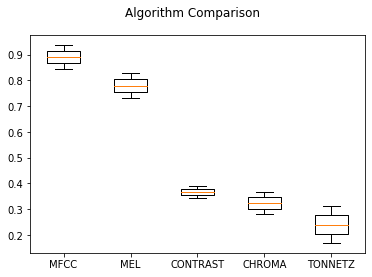

In [79]:
# boxplot algorithm comparison
names=['MFCC','MEL','CONTRAST','CHROMA','TONNETZ']
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()